<a href="https://colab.research.google.com/github/trong-shen/Game-of-Throne-Project/blob/master/GOT_predictive_model_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the CSV file from Github

In [47]:
import pandas as pd
import numpy as np
import string
!pip install nltk
import nltk
nltk.download('all')


GOT= pd.read_csv('https://raw.githubusercontent.com/trong-shen/Game-of-Throne-Project/master/Game_of_Thrones_Script_clean.csv')
char_info=pd.read_csv('https://raw.githubusercontent.com/trong-shen/Game-of-Throne-Project/master/got_table.csv')
print(len(GOT))

#Extract only the house data from char_info
House=char_info[['name','house']]

#Created a function to apply globally to the data frame
def return_house(name):
  house_dict=dict(zip(House.name,House.house))
  try: 
    house=house_dict[name]
    return(house)
  except KeyError:
    return(float("Nan"))

# Apply the house dict function to the whole GOT dataframe
GOT['House']=GOT['Name'].apply(lambda x:return_house(x))


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

In [0]:
#list of contractions and the expanded mapping used for cleaning the data
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"l": "i",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}


In [0]:
#define a function, expand_contractions, which takes a string and expands all contractions within the string using contraction_map
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    expanded = ''
    text = text.lower() #make all text lowercase
    wordList = text.split() #put text into a list of words
    for i in range(len(wordList)):
        if wordList[i] in contraction_mapping.keys(): #for each word, if it is a contraction in the listing
            expanded = expanded + ' ' + contraction_mapping[wordList[i]] #then replace with the expanded version
        else:
            expanded = expanded + ' ' + wordList[i] #otherwise, keep the original word
    return expanded

#define a function, remove_punctuation, which takes in a string and removes all punctuation 
def remove_punctuation(s):
    s = s.translate(str.maketrans('','',string.punctuation)) #take out punctuation in the sentence
    j = nltk.word_tokenize(s.lower()) #put each word in the sentence within a list, j
    return s

#define function, clean_sentences, which removes punctuation and expands all contractions in a sentence
def clean_sentences(text):
    return remove_punctuation(expand_contractions(text))
    

In [0]:
#Expand contractions, remove punctuation all in one function clean_sentence
GOT['Sentences_Clean'] = GOT.Sentence.apply(lambda x:clean_sentences(x))


In [0]:
#Calculate words per line, assuming contractions are all expanded
GOT["Num_Words"] = GOT.Sentences_Clean.apply(lambda x: len(x.split()))
GOT.to_csv (r'GOT_house_csv.csv', index = False, header=True)

# Now we will  prepare data for our Machine Learning Predictive model by only looking at mostly season 1 data and a subsection of season 2 data


In [52]:
#Extract only season one data and two data
GOT1=GOT[GOT.Season=="Season 1"]
GOT2=GOT[GOT.Season=="Season 2"]

print(GOT1.head())
print(GOT1.info())

print(GOT2.head())
print(GOT2.info())

  Release Date  ... Num_Words
0    4/17/2011  ...        27
1    4/17/2011  ...        23
2    4/17/2011  ...         5
3    4/17/2011  ...         5
4    4/17/2011  ...         7

[5 rows x 9 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3179 entries, 0 to 3178
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Release Date     3179 non-null   object
 1   Season           3179 non-null   object
 2   Episode          3179 non-null   object
 3   Episode Title    3179 non-null   object
 4   Name             3179 non-null   object
 5   Sentence         3179 non-null   object
 6   House            2907 non-null   object
 7   Sentences_Clean  3179 non-null   object
 8   Num_Words        3179 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 248.4+ KB
None
     Release Date    Season  ...                     Sentences_Clean Num_Words
3179     4/1/2012  Season 2  ...        well struck… well str

In [53]:
#Tokenize the words and remove between words punctunations
tokenizer=nltk.RegexpTokenizer(r"\w+")
GOT1['Tokenized_Sentence']=GOT1.Sentences_Clean.apply(lambda x:tokenizer.tokenize(x.lower()))
GOT2['Tokenized_Sentence']=GOT2.Sentences_Clean.apply(lambda x:tokenizer.tokenize(x.lower()))
GOT1.head(100)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Release Date,Season,Episode,Episode Title,Name,Sentence,House,Sentences_Clean,Num_Words,Tokenized_Sentence
0,4/17/2011,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...,NaN,what do you expect they are savages one lot s...,27,"[what, do, you, expect, they, are, savages, on..."
1,4/17/2011,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...,NaN,i have never seen wildlings do a thing like t...,23,"[i, have, never, seen, wildlings, do, a, thing..."
2,4/17/2011,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?,NaN,how close did you get,5,"[how, close, did, you, get]"
3,4/17/2011,Season 1,Episode 1,Winter is Coming,will,Close as any man would.,NaN,close as any man would,5,"[close, as, any, man, would]"
4,4/17/2011,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.,NaN,we should head back to the wall,7,"[we, should, head, back, to, the, wall]"
...,...,...,...,...,...,...,...,...,...,...
95,4/17/2011,Season 1,Episode 1,Winter is Coming,catelyn stark,"You can always say no, Ned.",House Stark,you can always say no ned,6,"[you, can, always, say, no, ned]"
96,4/17/2011,Season 1,Episode 1,Winter is Coming,catelyn stark,We need plenty of candles for Lord Tyrion's ch...,House Stark,we need plenty of candles for lord tyrions ch...,16,"[we, need, plenty, of, candles, for, lord, tyr..."
97,4/17/2011,Season 1,Episode 1,Winter is Coming,maester luwin,I'm told he drinks all night.,NaN,i am told he drinks all night,7,"[i, am, told, he, drinks, all, night]"
98,4/17/2011,Season 1,Episode 1,Winter is Coming,catelyn stark,How much could he possibly drink? A man of his...,House Stark,how much could he possibly drink a man of his...,12,"[how, much, could, he, possibly, drink, a, man..."


In [0]:
#Remove stopwords for sentiment analysis
stopword=nltk.corpus.stopwords.words('english')


In [0]:
#Define a function to remove stop words
def remove_stopwords(tokenized_sentence):
  text=[word for word in tokenized_sentence if word not in stopword]
  return text

In [56]:
#Implement the remove stop words function to a new column 
GOT1['Tokenized_No_Stop']=GOT1.Tokenized_Sentence.apply(lambda x:remove_stopwords(x))
GOT2['Tokenized_No_Stop']=GOT2.Tokenized_Sentence.apply(lambda x:remove_stopwords(x))
GOT1.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Release Date,Season,Episode,Episode Title,Name,Sentence,House,Sentences_Clean,Num_Words,Tokenized_Sentence,Tokenized_No_Stop
0,4/17/2011,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...,NaN,what do you expect they are savages one lot s...,27,"[what, do, you, expect, they, are, savages, on...","[expect, savages, one, lot, steals, goat, anot..."
1,4/17/2011,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...,NaN,i have never seen wildlings do a thing like t...,23,"[i, have, never, seen, wildlings, do, a, thing...","[never, seen, wildlings, thing, like, never, s..."
2,4/17/2011,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?,NaN,how close did you get,5,"[how, close, did, you, get]","[close, get]"
3,4/17/2011,Season 1,Episode 1,Winter is Coming,will,Close as any man would.,NaN,close as any man would,5,"[close, as, any, man, would]","[close, man, would]"
4,4/17/2011,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.,NaN,we should head back to the wall,7,"[we, should, head, back, to, the, wall]","[head, back, wall]"


In [57]:
# Stemming of the Non Stop Words Column
wn=nltk.WordNetLemmatizer()

def stem_reduction(tokenized_sentence):
  sentence=[wn.lemmatize(word) for word in tokenized_sentence]
  return (sentence)

GOT1['Stemmed_Sentence']=GOT1['Tokenized_No_Stop'].apply(lambda x:stem_reduction(x))
GOT2['Stemmed_Sentence']=GOT2['Tokenized_No_Stop'].apply(lambda x:stem_reduction(x))
GOT1.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Release Date,Season,Episode,Episode Title,Name,Sentence,House,Sentences_Clean,Num_Words,Tokenized_Sentence,Tokenized_No_Stop,Stemmed_Sentence
3174,6/19/2011,Season 1,Episode 10,Fire and Blood,daenerys targaryen,ls that what you fear? You will be my khalasar...,House Targaryen,ls that what you fear you will be my khalasar...,47,"[ls, that, what, you, fear, you, will, be, my,...","[ls, fear, khalasar, see, faces, slaves, free,...","[l, fear, khalasar, see, face, slave, free, ta..."
3175,6/19/2011,Season 1,Episode 10,Fire and Blood,daenerys targaryen,"Ser Jorah, bind this woman to the pyre. You sw...",House Targaryen,ser jorah bind this woman to the pyre you swo...,13,"[ser, jorah, bind, this, woman, to, the, pyre,...","[ser, jorah, bind, woman, pyre, swore, obey]","[ser, jorah, bind, woman, pyre, swore, obey]"
3176,6/19/2011,Season 1,Episode 10,Fire and Blood,mirri maz duur,You will not hear me scream.,0,you will not hear me scream,6,"[you, will, not, hear, me, scream]","[hear, scream]","[hear, scream]"
3177,6/19/2011,Season 1,Episode 10,Fire and Blood,daenerys targaryen,I will. But it is not your screams I want. Onl...,House Targaryen,i will but it is not your screams i want only...,13,"[i, will, but, it, is, not, your, screams, i, ...","[screams, want, life]","[scream, want, life]"
3178,6/19/2011,Season 1,Episode 10,Fire and Blood,jorah mormont,Blood of my blood.,House Mormont,blood of my blood,4,"[blood, of, my, blood]","[blood, blood]","[blood, blood]"


In [58]:
#We will be using the Vader Sentiment analysis tool for sentiment analysis.
#The function however works only on a string of sentence instead of a list of words (tokenized sentence)
#Join the Tokenized Stemmed_Sentence into a string of sentence for the VADER sentiment analysis

def convert_sentence (tokenized_sentence):
  sentence=''
  for word in tokenized_sentence:
    sentence=sentence+" "+word
  return sentence

GOT1['Stemmed_Sentence_Non_Token']=GOT1['Stemmed_Sentence'].apply(lambda x:convert_sentence(x))
GOT2['Stemmed_Sentence_Non_Token']=GOT2['Stemmed_Sentence'].apply(lambda x:convert_sentence(x))
GOT1['Stemmed_Sentence_Non_Token'].head()




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


0     expect savage one lot steal goat another lot ...
1     never seen wildlings thing like never seen th...
2                                            close get
3                                      close man would
4                                       head back wall
Name: Stemmed_Sentence_Non_Token, dtype: object

In [59]:
#Use Vader Sentiment analysis tool 
#Import a define a function for outputing the whole score output and only the compound score

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid=SentimentIntensityAnalyzer()

GOT1['Sentiment']=GOT1['Stemmed_Sentence_Non_Token'].apply(lambda x:sid.polarity_scores(x))

def compound_score(Sentiment):
  return(Sentiment['compound'])

GOT1['Sentiment_Compound_Score']=GOT1['Sentiment'].apply(lambda x:compound_score(x))
GOT1.head(100)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Release Date,Season,Episode,Episode Title,Name,Sentence,House,Sentences_Clean,Num_Words,Tokenized_Sentence,Tokenized_No_Stop,Stemmed_Sentence,Stemmed_Sentence_Non_Token,Sentiment,Sentiment_Compound_Score
0,4/17/2011,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...,NaN,what do you expect they are savages one lot s...,27,"[what, do, you, expect, they, are, savages, on...","[expect, savages, one, lot, steals, goat, anot...","[expect, savage, one, lot, steal, goat, anothe...",expect savage one lot steal goat another lot ...,"{'neg': 0.408, 'neu': 0.592, 'pos': 0.0, 'comp...",-0.7351
1,4/17/2011,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...,NaN,i have never seen wildlings do a thing like t...,23,"[i, have, never, seen, wildlings, do, a, thing...","[never, seen, wildlings, thing, like, never, s...","[never, seen, wildlings, thing, like, never, s...",never seen wildlings thing like never seen th...,"{'neg': 0.0, 'neu': 0.643, 'pos': 0.357, 'comp...",0.6124
2,4/17/2011,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?,NaN,how close did you get,5,"[how, close, did, you, get]","[close, get]","[close, get]",close get,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,4/17/2011,Season 1,Episode 1,Winter is Coming,will,Close as any man would.,NaN,close as any man would,5,"[close, as, any, man, would]","[close, man, would]","[close, man, would]",close man would,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,4/17/2011,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.,NaN,we should head back to the wall,7,"[we, should, head, back, to, the, wall]","[head, back, wall]","[head, back, wall]",head back wall,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4/17/2011,Season 1,Episode 1,Winter is Coming,catelyn stark,"You can always say no, Ned.",House Stark,you can always say no ned,6,"[you, can, always, say, no, ned]","[always, say, ned]","[always, say, ned]",always say ned,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
96,4/17/2011,Season 1,Episode 1,Winter is Coming,catelyn stark,We need plenty of candles for Lord Tyrion's ch...,House Stark,we need plenty of candles for lord tyrions ch...,16,"[we, need, plenty, of, candles, for, lord, tyr...","[need, plenty, candles, lord, tyrions, chamber...","[need, plenty, candle, lord, tyrions, chamber,...",need plenty candle lord tyrions chamber told ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
97,4/17/2011,Season 1,Episode 1,Winter is Coming,maester luwin,I'm told he drinks all night.,NaN,i am told he drinks all night,7,"[i, am, told, he, drinks, all, night]","[told, drinks, night]","[told, drink, night]",told drink night,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
98,4/17/2011,Season 1,Episode 1,Winter is Coming,catelyn stark,How much could he possibly drink? A man of his...,House Stark,how much could he possibly drink a man of his...,12,"[how, much, could, he, possibly, drink, a, man...","[much, could, possibly, drink, man, stature]","[much, could, possibly, drink, man, stature]",much could possibly drink man stature,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [60]:
#Set the character and house to category

GOT1.info()
GOT1['Name'].astype('category')
GOT1['House'].astype('category')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3179 entries, 0 to 3178
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Release Date                3179 non-null   object 
 1   Season                      3179 non-null   object 
 2   Episode                     3179 non-null   object 
 3   Episode Title               3179 non-null   object 
 4   Name                        3179 non-null   object 
 5   Sentence                    3179 non-null   object 
 6   House                       2907 non-null   object 
 7   Sentences_Clean             3179 non-null   object 
 8   Num_Words                   3179 non-null   int64  
 9   Tokenized_Sentence          3179 non-null   object 
 10  Tokenized_No_Stop           3179 non-null   object 
 11  Stemmed_Sentence            3179 non-null   object 
 12  Stemmed_Sentence_Non_Token  3179 non-null   object 
 13  Sentiment                   3179 

0                   NaN
1                   NaN
2                   NaN
3                   NaN
4                   NaN
             ...       
3174    House Targaryen
3175    House Targaryen
3176                  0
3177    House Targaryen
3178      House Mormont
Name: House, Length: 3179, dtype: category
Categories (24, object): [0, Dothraki, Free Folk, House Arryn, ..., House Trant,
                          House Tyrell, House Umber, Night's Watch]

In [61]:
#A Pivot Table to Show mean Compiund_Score by House
table=pd.pivot_table(GOT1,values='Sentiment_Compound_Score',index=['House'],aggfunc=['mean','count'])
table


,mean,count
,Sentiment_Compound_Score,Sentiment_Compound_Score
House,,
0,0.061431,140
Dothraki,-0.153479,24
Free Folk,0.064064,25
House Arryn,0.057911,47
House Baelish,0.126756,112
House Baratheon,-0.042422,172
House Bronn,-0.003824,33
House Cassel,0.018716,44


##Compound score ranges from -1 to 1 with -1 being most negative sentiment, 0 being most neutral, and 1 being most positive. As shown most houses' lines are very close to neutral except for some houses which are futher away. However, they also have lower number of lines as well. In general, characters from all different houses have relatively netural sentences in terms of sentiment. 

###The counts in the table also equates to number of lines spoken by each house, and for simplicity sake, we will only work with the top 4 houses for future analysis. That is **House Start, Mormont, Lannister, and Targaryen**.



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 15 to 3178
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Release Date                2009 non-null   object 
 1   Season                      2009 non-null   object 
 2   Episode                     2009 non-null   object 
 3   Episode Title               2009 non-null   object 
 4   Name                        2009 non-null   object 
 5   Sentence                    2009 non-null   object 
 6   House                       2009 non-null   object 
 7   Sentences_Clean             2009 non-null   object 
 8   Num_Words                   2009 non-null   int64  
 9   Tokenized_Sentence          2009 non-null   object 
 10  Tokenized_No_Stop           2009 non-null   object 
 11  Stemmed_Sentence            2009 non-null   object 
 12  Stemmed_Sentence_Non_Token  2009 non-null   object 
 13  Sentiment                   2009

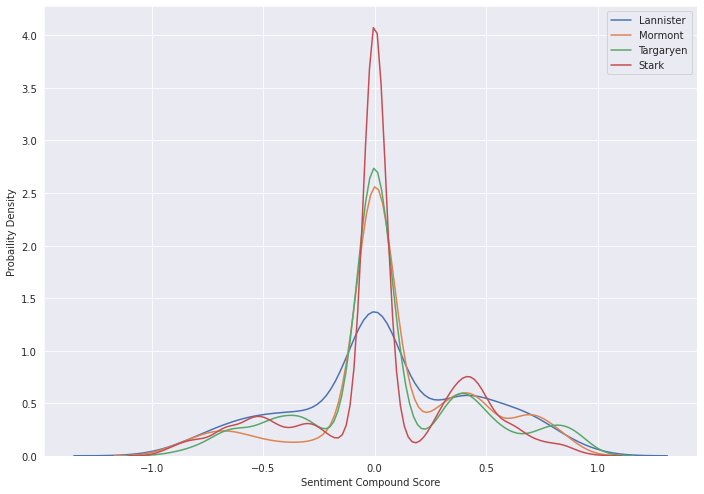

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#Create a data frame with just the 4 major houses
#For ease of processing later, we will redefine a dataframe called GOT1TopHouses with only data of interest for later ML processing
GOT1TopHouses=GOT1[GOT1['House'].isin(['House Lannister', 'House Stark','House Targaryen', 'House Mormont'])]
print(GOT1TopHouses.info())

#Plotting distributions 
House_Lannister=GOT1TopHouses[GOT1TopHouses.House=='House Lannister']
House_Targaryen=GOT1TopHouses[GOT1TopHouses.House=='House Targaryen']
House_Stark=GOT1TopHouses[GOT1TopHouses.House=='House Stark']
House_Mormont=GOT1TopHouses[GOT1TopHouses.House=='House Mormont']

# Will only focus on the four main houses Lannister, Targaryen, Stark, and Mormont

sns.set({'figure.figsize':(11.7,8.27)})
sns.set_style({'figure.facecolor':'white'})
plt.xlabel('Sentiment Compound Score')
plt.ylabel('Probaility Density')

sns.distplot(House_Lannister[['Sentiment_Compound_Score']], hist=False, kde=True, label='Lannister')
sns.distplot(House_Mormont[['Sentiment_Compound_Score']], hist=False, kde=True, label='Mormont')
sns.distplot(House_Targaryen[['Sentiment_Compound_Score']], hist=False,kde=True,label='Targaryen')
sns.distplot(House_Stark[['Sentiment_Compound_Score']], hist=False, kde=True,label='Stark')

## As can seen from the above, there doesn't seem to be clear distinct separation in the sentiment distribution. But there is some standard deviation differences between them. We will analyze the standard deviation below.


In [63]:
#A Pivot Table to Show mean and standard deviation Compiund_Score by House only for the four houses of interest

table=pd.pivot_table(GOT1TopHouses,values='Sentiment_Compound_Score',index=['House'],aggfunc=['mean','std','count'])
table

GOT1TopHouses.head(100)

,Release Date,Season,Episode,Episode Title,Name,Sentence,House,Sentences_Clean,Num_Words,Tokenized_Sentence,Tokenized_No_Stop,Stemmed_Sentence,Stemmed_Sentence_Non_Token,Sentiment,Sentiment_Compound_Score
15,4/17/2011,Season 1,Episode 1,Winter is Coming,jon snow,Go on. Father's watching.,House Stark,go on fathers watching,4,"[go, on, fathers, watching]","[go, fathers, watching]","[go, father, watching]",go father watching,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
16,4/17/2011,Season 1,Episode 1,Winter is Coming,jon snow,And your mother.,House Stark,and your mother,3,"[and, your, mother]",[mother],[mother],mother,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
17,4/17/2011,Season 1,Episode 1,Winter is Coming,mordane,"Fine work, as always. Well done.",House Stark,fine work as always well done,6,"[fine, work, as, always, well, done]","[fine, work, always, well, done]","[fine, work, always, well, done]",fine work always well done,"{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'comp...",0.4404
18,4/17/2011,Season 1,Episode 1,Winter is Coming,sansa stark,Thank you.,House Stark,thank you,2,"[thank, you]",[thank],[thank],thank,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.3612
19,4/17/2011,Season 1,Episode 1,Winter is Coming,mordane,I love the detail that you've managed to get i...,House Stark,i love the detail that you have managed to ge...,20,"[i, love, the, detail, that, you, have, manage...","[love, detail, managed, get, corners, quite, b...","[love, detail, managed, get, corner, quite, be...",love detail managed get corner quite beautifu...,"{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...",0.8553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,4/17/2011,Season 1,Episode 1,Winter is Coming,arya stark,That's Jaime Lannister. The queen's twin brother.,House Stark,that is jaime lannister the queens twin brother,8,"[that, is, jaime, lannister, the, queens, twin...","[jaime, lannister, queens, twin, brother]","[jaime, lannister, queen, twin, brother]",jaime lannister queen twin brother,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
130,4/17/2011,Season 1,Episode 1,Winter is Coming,sansa stark,Would you please shut up.,House Stark,would you please shut up,5,"[would, you, please, shut, up]","[would, please, shut]","[would, please, shut]",would please shut,"{'neg': 0.0, 'neu': 0.465, 'pos': 0.535, 'comp...",0.3182
131,4/17/2011,Season 1,Episode 1,Winter is Coming,eddard stark,My queen.,House Stark,my queen,2,"[my, queen]",[queen],[queen],queen,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
132,4/17/2011,Season 1,Episode 1,Winter is Coming,catelyn stark,My queen.,House Stark,my queen,2,"[my, queen]",[queen],[queen],queen,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


#Before we proceed with Machine Learning Model predicting whose house line it is, we need to extract more attributes other than sentiment score.

##We want attributes based on each house's favourite word. Thus we will first compile a list of favourite words for each house of interest (for the four houses mentioned above)

In [64]:
# First we find the number of words spoken by each top four houses in Season 1
GOT1HouseData = pd.pivot_table(GOT1, values = 'Num_Words', index = 'House', aggfunc=np.sum)
GOT1HouseData = GOT1HouseData.sort_values('Num_Words') #find Houses with the most words said
GOT1_TopHousesData = GOT1HouseData.tail(10)

GOT1_TopHousesData = pd.DataFrame(GOT1_TopHousesData.to_records()) #convert into a dataframe
GOT1_TopHousesData

,House,Num_Words
0,House Tarly,629
1,House Greyjoy,735
2,Night's Watch,949
3,House Mormont,1577
4,House Baelish,1753
5,0,2033
6,House Baratheon,3238
7,House Targaryen,3286
8,House Lannister,8635
9,House Stark,10176


In [0]:
# These are the same functions used in the whole season data analysis protion of this project. 
# Create a list of words based on house and create a dictionary with the key being the word spoken and value ebing the frequency it was spoken

#define a function, house_words, that appends all tokenized_no_stop words for a chosen character in the form of a list
def house_words(house):
    l = []
    for index, row in GOT1TopHouses.iterrows():
        if house in row.House:
            l = l + row.Tokenized_No_Stop
    return l

#define a function, house_most_freq, that takes a house and outputs the listing of words spoken & number of times they were spoken
#only find the top 100 words
def house_most_freq(s):
    wordlist = house_words(s) #get the list of words said for the house
    word_dict = {} #create dictionary to track count of unique words
    for i in wordlist:
        if i in word_dict.keys():
            word_dict[i] = word_dict[i] + 1
        else:
            word_dict[i] = 1
    freq = sorted(word_dict.items(), key=lambda x: x[1], reverse=True) #sort by value
    word_list=[i1 for i1,i2 in freq]
    #output only the 100 words
    return freq[0:100]


## Below shows 5 most spoken words for each house and the number of times each was said in season one.


In [66]:
house_most_freq('House Lannister')[0:5]

[('would', 43), ('lord', 40), ('stark', 37), ('king', 33), ('us', 30)]

In [67]:
house_most_freq('House Targaryen')[0:5]

[('khaleesi', 26), ('dragon', 19), ('want', 18), ('men', 15), ('khal', 15)]

In [68]:
house_most_freq('House Stark')[0:5]

[('would', 57), ('lord', 53), ('king', 50), ('know', 48), ('father', 46)]

In [69]:
house_most_freq('House Mormont')[0:5]

[('khaleesi', 12), ('man', 8), ('good', 7), ('think', 7), ('dothraki', 6)]

### Other than the some general worlds I and would, most houses have relatively distinct word choices:
* ### Lannister has Lord, Stark, and king
* ### Targaryen: Khalessi, Dragon, Want, Know
* ### Stark: Father, Lord, I, Know
* ### Mormont: Khalessi, Man, Good, Think



### Now we will create a word choice rscorefor each house of interest (thus 4 attributes). Each line will have a specific house ranking calculated as follows: 
### word_score=frequncy_of_that_word/total number of words spoken by that house
### House_word_prob=sum(word_score)/number_of_words in that sentence


In [0]:
#Define a function that calculates the word score in each house which shows how popular it is.

def house_word_score(house,sentence):
  word_list, freq_list=zip(*house_most_freq(house))
  house_num_words=int(GOT1_TopHousesData[GOT1_TopHousesData['House']==house].Num_Words)
  score_sum=0
  for word in sentence:
    try:
      word_score=freq_list[word_list.index(word)]/house_num_words
      score_sum=score_sum+word_score
    except:
      pass
  try:
    return score_sum/(len(sentence))
  except:
    return 0


In [0]:

#Applying that to every line in the GOT1TopHouse dataframe to create 4 attributes for each house
"""
GOT1TopHouses['Lannister_Word_Score']=GOT1TopHouses.Stemmed_Sentence.apply(lambda x:house_word_score('House Lannister',x))
GOT1TopHouses['Stark_Word_Score']=GOT1TopHouses.Stemmed_Sentence.apply(lambda x:house_word_score('House Stark',x))
GOT1TopHouses['Targaryen_Word_Score']=GOT1TopHouses.Stemmed_Sentence.apply(lambda x:house_word_score('House Targaryen',x))
GOT1TopHouses['Mormont_Word_Score']=GOT1TopHouses.Stemmed_Sentence.apply(lambda x:house_word_score('House Mormont',x))
"""

#The above processing takes too long so we will just import an already processed csv file below

GOT1TopHouses_2=pd.read_csv('https://raw.githubusercontent.com/trong-shen/Game-of-Throne-Project/master/GOT1TopHouses.csv')


In [72]:
GOT1TopHouses_2.head(10)

,Unnamed: 0,Release Date,Season,Episode,Episode Title,Name,Sentence,House,Sentences_Clean,Num_Words,Tokenized_Sentence,Tokenized_No_Stop,Stemmed_Sentence,Stemmed_Sentence_Non_Token,Sentiment,Sentiment_Compound_Score,Lannister_Word_Score,Stark_Word_Score,Targaryen_Word_Score,Mormont_Word_Score
0,15,4/17/2011,Season 1,Episode 1,Winter is Coming,jon snow,Go on. Father's watching.,House Stark,go on fathers watching,4,"['go', 'on', 'fathers', 'watching']","['go', 'fathers', 'watching']","['go', 'father', 'watching']",go father watching,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.001621,0.002719,0.001116,0.001480
1,16,4/17/2011,Season 1,Episode 1,Winter is Coming,jon snow,And your mother.,House Stark,and your mother,3,"['and', 'your', 'mother']",['mother'],['mother'],mother,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.001390,0.001376,0.000000,0.000000
2,17,4/17/2011,Season 1,Episode 1,Winter is Coming,mordane,"Fine work, as always. Well done.",House Stark,fine work as always well done,6,"['fine', 'work', 'as', 'always', 'well', 'done']","['fine', 'work', 'always', 'well', 'done']","['fine', 'work', 'always', 'well', 'done']",fine work always well done,"{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'comp...",0.4404,0.000556,0.000825,0.000548,0.000380
3,18,4/17/2011,Season 1,Episode 1,Winter is Coming,sansa stark,Thank you.,House Stark,thank you,2,"['thank', 'you']",['thank'],['thank'],thank,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.3612,0.000000,0.000000,0.000000,0.000000
4,19,4/17/2011,Season 1,Episode 1,Winter is Coming,mordane,I love the detail that you've managed to get i...,House Stark,i love the detail that you have managed to ge...,20,"['i', 'love', 'the', 'detail', 'that', 'you', ...","['love', 'detail', 'managed', 'get', 'corners'...","['love', 'detail', 'managed', 'get', 'corner',...",love detail managed get corner quite beautifu...,"{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...",0.8553,0.000304,0.000295,0.000266,0.000159
5,20,4/17/2011,Season 1,Episode 1,Winter is Coming,eddard stark,And which one of you was a marksman at ten? Ke...,House Stark,and which one of you was a marksman at ten ke...,15,"['and', 'which', 'one', 'of', 'you', 'was', 'a...","['one', 'marksman', 'ten', 'keep', 'practicing...","['one', 'marksman', 'ten', 'keep', 'practicing...",one marksman ten keep practicing bran go,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000645,0.001362,0.001087,0.000634
6,21,4/17/2011,Season 1,Episode 1,Winter is Coming,jon snow,"Don't think too much, Bran.",House Stark,do not think too much bran,6,"['do', 'not', 'think', 'too', 'much', 'bran']","['think', 'much', 'bran']","['think', 'much', 'bran']",think much bran,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000926,0.000950,0.000609,0.001480
7,22,4/17/2011,Season 1,Episode 1,Winter is Coming,robb stark,Relax your bow arm.,House Stark,relax your bow arm,4,"['relax', 'your', 'bow', 'arm']","['relax', 'bow', 'arm']","['relax', 'bow', 'arm']",relax bow arm,"{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...",0.4404,0.000000,0.000000,0.000000,0.000000
8,23,4/17/2011,Season 1,Episode 1,Winter is Coming,robb stark,"Quick, Bran, faster!",House Stark,quick bran faster,3,"['quick', 'bran', 'faster']","['quick', 'bran', 'faster']","['quick', 'bran', 'faster']",quick bran faster,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000000,0.000524,0.000000,0.000000
9,25,4/17/2011,Season 1,Episode 1,Winter is Coming,eddard stark,Get the lads to saddle their horses.,House Stark,get the lads to saddle their horses,7,"['get', 'the', 'lads', 'to', 'saddle', 'their'...","['get', 'lads', 'saddle', 'horses']","['get', 'lad', 'saddle', 'horse']",get lad saddle horse,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000347,0.000590,0.000000,0.000317


In [73]:
#Evaluate the mean of these Word_scores
table=pd.pivot_table(GOT1TopHouses_2,values=['Lannister_Word_Score','Stark_Word_Score','Targaryen_Word_Score','Mormont_Word_Score'],index=['House'],aggfunc=['mean'])
table


mean  ...                     
                Lannister_Word_Score  ... Targaryen_Word_Score
House                                 ...                     
House Lannister             0.000740  ...             0.000560
House Mormont               0.000447  ...             0.000905
House Stark                 0.000655  ...             0.000651
House Targaryen             0.000527  ...             0.001447

[4 rows x 4 columns]

###House Stark and House Targaryen have the highest mean Stark_word_Score and Targaryen_word_score respectively, which is reasonable. 
###The other two houses however have the their top two scores being their own house' word score, which is not ideal.

Check to see if the distribution for the House Lannister Ranking is distinct

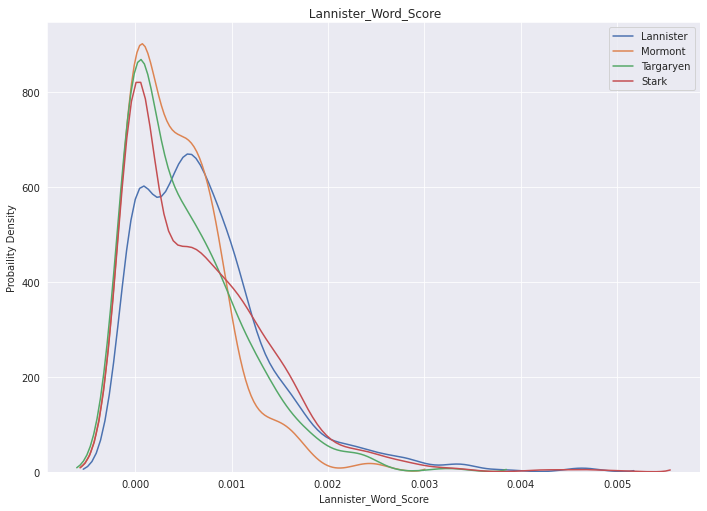

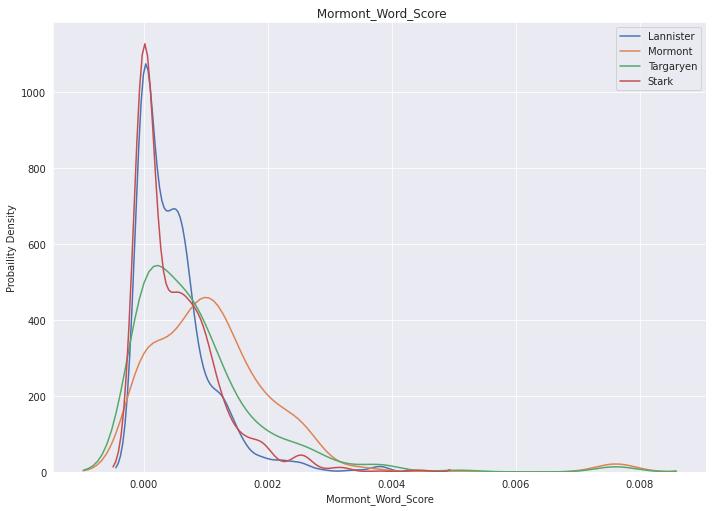

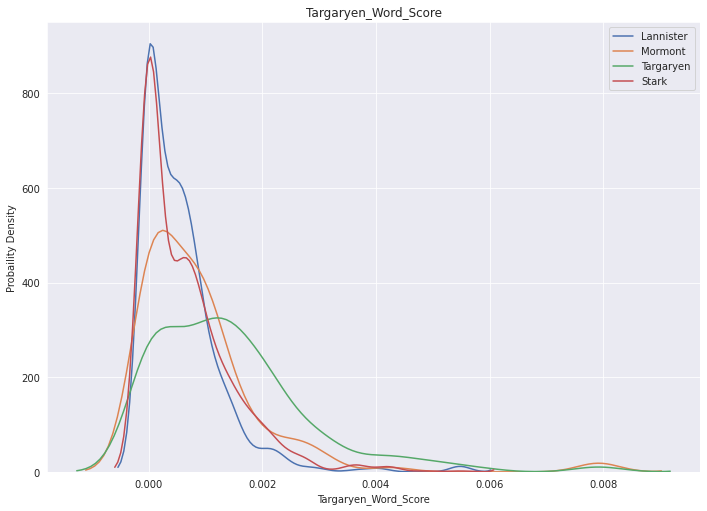

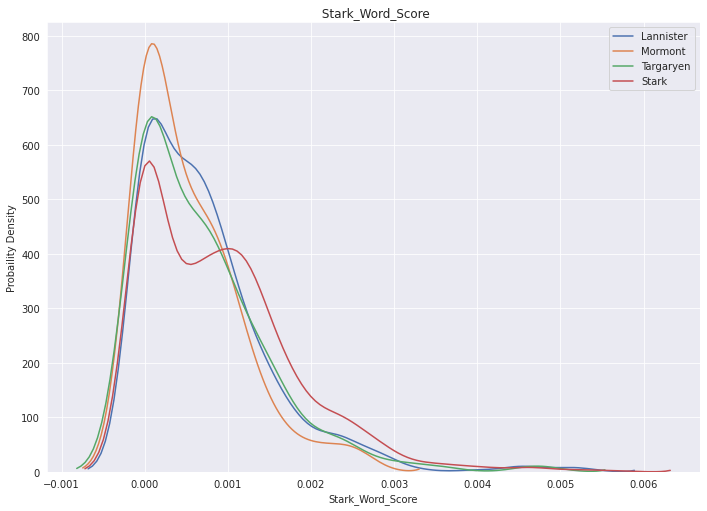

In [74]:
#Plotting distributions and using KDE as an estimation to each distribution.
House_Lannister=GOT1TopHouses_2[GOT1TopHouses_2.House=='House Lannister']
House_Targaryen=GOT1TopHouses_2[GOT1TopHouses_2.House=='House Targaryen']
House_Stark=GOT1TopHouses_2[GOT1TopHouses_2.House=='House Stark']
House_Mormont=GOT1TopHouses_2[GOT1TopHouses_2.House=='House Mormont']

sns.set({'figure.figsize':(11.7,8.27)})
sns.set_style({'figure.facecolor':'white'})
plt.figure(0)
plt.xlabel('Lannister_Word_Score')
plt.ylabel('Probaility Density')
plt.title(' Lannister_Word_Score')

sns.distplot(House_Lannister[['Lannister_Word_Score']], hist=False, kde=True, label='Lannister')
sns.distplot(House_Mormont[['Lannister_Word_Score']], hist=False, kde=True, label='Mormont')
sns.distplot(House_Targaryen[['Lannister_Word_Score']], hist=False,kde=True,label='Targaryen')
sns.distplot(House_Stark[['Lannister_Word_Score']], hist=False, kde=True,label='Stark')


sns.set({'figure.figsize':(11.7,8.27)})
sns.set_style({'figure.facecolor':'white'})
plt.figure(1)
plt.xlabel('Mormont_Word_Score')
plt.ylabel('Probaility Density')
plt.title(' Mormont_Word_Score')

sns.distplot(House_Lannister[['Mormont_Word_Score']], hist=False, kde=True, label='Lannister')
sns.distplot(House_Mormont[['Mormont_Word_Score']], hist=False, kde=True, label='Mormont')
sns.distplot(House_Targaryen[['Mormont_Word_Score']], hist=False,kde=True,label='Targaryen')
sns.distplot(House_Stark[['Mormont_Word_Score']], hist=False, kde=True,label='Stark')

sns.set({'figure.figsize':(11.7,8.27)})
sns.set_style({'figure.facecolor':'white'})
plt.figure(2)
plt.xlabel('Targaryen_Word_Score')
plt.ylabel('Probaility Density')
plt.title('Targaryen_Word_Score')

sns.distplot(House_Lannister[['Targaryen_Word_Score']], hist=False, kde=True, label='Lannister')
sns.distplot(House_Mormont[['Targaryen_Word_Score']], hist=False, kde=True, label='Mormont')
sns.distplot(House_Targaryen[['Targaryen_Word_Score']], hist=False,kde=True,label='Targaryen')
sns.distplot(House_Stark[['Targaryen_Word_Score']], hist=False, kde=True,label='Stark')


sns.set({'figure.figsize':(11.7,8.27)})
sns.set_style({'figure.facecolor':'white'})
plt.figure(3)
plt.xlabel('Stark_Word_Score')
plt.ylabel('Probaility Density')
plt.title(' Stark_Word_Score')

sns.distplot(House_Lannister[['Stark_Word_Score']], hist=False, kde=True, label='Lannister')
sns.distplot(House_Mormont[['Stark_Word_Score']], hist=False, kde=True, label='Mormont')
sns.distplot(House_Targaryen[['Stark_Word_Score']], hist=False,kde=True,label='Targaryen')
sns.distplot(House_Stark[['Stark_Word_Score']], hist=False, kde=True,label='Stark')


####We can see despite the mean value of the word score not entirely clear at distingusihing betwen the house, you can see the KDE estimation distribution skewed to the right for that particular house. For example, House Stark has a ,house_word_score distribution skewed most to the right (higher Stark_Word_score), and so on and so forth for each house and its house_word_score. This means it's likely that we can still proceed with ML to acheive a decent ML using this feature.

### We would also like to explore if there ia any difference in number of words spoken in a line for each house. Number of words spoken can be used to indicate if this person is more outspoken or no or if they are more concise or not. 
### We can't however just use our attribute Num_Words as some rows have multiple words per line.

###We will idneitfy the number of rows in each line based on common punctuation such as comma and question mark

In [75]:
#Count number of lines per row of data frame based on punctuation

def count_punc(sentence):
  counter=0
  num_char=len(sentence)
  for character in sentence:
    if character=="." and sentence[sentence.find(character)-1]!=".":
      counter=counter+1
    elif character=="…":
      counter=counter+1
    elif character=="?" or character=="!":
      counter=counter+1
    elif character==sentence[-1] and counter==0:
      counter=1
  return counter

#add another column of Num_Words_per_line
GOT1TopHouses_2['Num_of_lines']=GOT1TopHouses_2['Sentence'].apply(lambda x:count_punc(x))
GOT1TopHouses_2['Num_Words_per_line']=GOT1TopHouses_2['Num_Words']/GOT1TopHouses_2['Num_of_lines']
GOT1TopHouses_2.head(100)



,Unnamed: 0,Release Date,Season,Episode,Episode Title,Name,Sentence,House,Sentences_Clean,Num_Words,Tokenized_Sentence,Tokenized_No_Stop,Stemmed_Sentence,Stemmed_Sentence_Non_Token,Sentiment,Sentiment_Compound_Score,Lannister_Word_Score,Stark_Word_Score,Targaryen_Word_Score,Mormont_Word_Score,Num_of_lines,Num_Words_per_line
0,15,4/17/2011,Season 1,Episode 1,Winter is Coming,jon snow,Go on. Father's watching.,House Stark,go on fathers watching,4,"['go', 'on', 'fathers', 'watching']","['go', 'fathers', 'watching']","['go', 'father', 'watching']",go father watching,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.001621,0.002719,0.001116,0.001480,2,2.0
1,16,4/17/2011,Season 1,Episode 1,Winter is Coming,jon snow,And your mother.,House Stark,and your mother,3,"['and', 'your', 'mother']",['mother'],['mother'],mother,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.001390,0.001376,0.000000,0.000000,1,3.0
2,17,4/17/2011,Season 1,Episode 1,Winter is Coming,mordane,"Fine work, as always. Well done.",House Stark,fine work as always well done,6,"['fine', 'work', 'as', 'always', 'well', 'done']","['fine', 'work', 'always', 'well', 'done']","['fine', 'work', 'always', 'well', 'done']",fine work always well done,"{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'comp...",0.4404,0.000556,0.000825,0.000548,0.000380,2,3.0
3,18,4/17/2011,Season 1,Episode 1,Winter is Coming,sansa stark,Thank you.,House Stark,thank you,2,"['thank', 'you']",['thank'],['thank'],thank,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.3612,0.000000,0.000000,0.000000,0.000000,1,2.0
4,19,4/17/2011,Season 1,Episode 1,Winter is Coming,mordane,I love the detail that you've managed to get i...,House Stark,i love the detail that you have managed to ge...,20,"['i', 'love', 'the', 'detail', 'that', 'you', ...","['love', 'detail', 'managed', 'get', 'corners'...","['love', 'detail', 'managed', 'get', 'corner',...",love detail managed get corner quite beautifu...,"{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...",0.8553,0.000304,0.000295,0.000266,0.000159,4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,129,4/17/2011,Season 1,Episode 1,Winter is Coming,arya stark,That's Jaime Lannister. The queen's twin brother.,House Stark,that is jaime lannister the queens twin brother,8,"['that', 'is', 'jaime', 'lannister', 'the', 'q...","['jaime', 'lannister', 'queens', 'twin', 'brot...","['jaime', 'lannister', 'queen', 'twin', 'broth...",jaime lannister queen twin brother,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.001251,0.000943,0.000670,0.000761,2,4.0
96,130,4/17/2011,Season 1,Episode 1,Winter is Coming,sansa stark,Would you please shut up.,House Stark,would you please shut up,5,"['would', 'you', 'please', 'shut', 'up']","['would', 'please', 'shut']","['would', 'please', 'shut']",would please shut,"{'neg': 0.0, 'neu': 0.465, 'pos': 0.535, 'comp...",0.3182,0.001660,0.002391,0.001724,0.000423,1,5.0
97,131,4/17/2011,Season 1,Episode 1,Winter is Coming,eddard stark,My queen.,House Stark,my queen,2,"['my', 'queen']",['queen'],['queen'],queen,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000000,0.001081,0.001217,0.002536,1,2.0
98,132,4/17/2011,Season 1,Episode 1,Winter is Coming,catelyn stark,My queen.,House Stark,my queen,2,"['my', 'queen']",['queen'],['queen'],queen,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000000,0.001081,0.001217,0.002536,1,2.0


In [76]:
#Evaluate the mean and count of num_words spoken per line to see if there is difference between them
table=pd.pivot_table(GOT1TopHouses_2,values=['Num_Words_per_line'],index=['House'],aggfunc=['count','mean'])
table

,count,mean
,Num_Words_per_line,Num_Words_per_line
House,,
House Lannister,564,6.632776
House Mormont,117,6.589387
House Stark,1053,5.685287
House Targaryen,275,5.710342


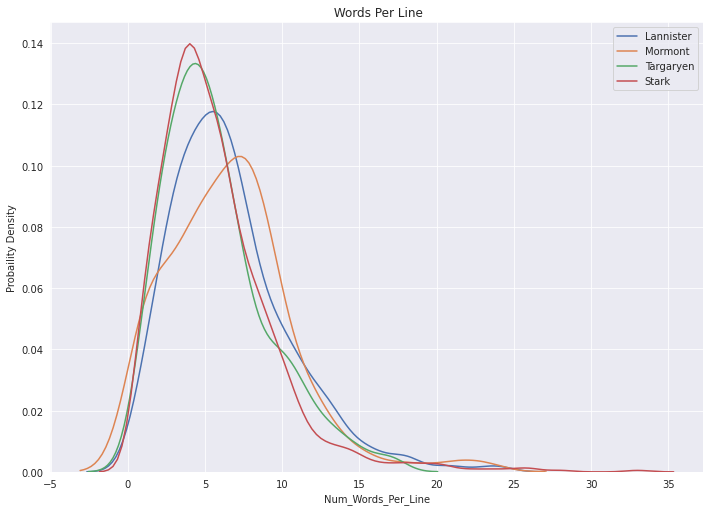

In [77]:
#Plotting distribution of number of words per line.
House_Lannister=GOT1TopHouses_2[GOT1TopHouses_2.House=='House Lannister']
House_Targaryen=GOT1TopHouses_2[GOT1TopHouses_2.House=='House Targaryen']
House_Stark=GOT1TopHouses_2[GOT1TopHouses_2.House=='House Stark']
House_Mormont=GOT1TopHouses_2[GOT1TopHouses_2.House=='House Mormont']


sns.set({'figure.figsize':(11.7,8.27)})
sns.set_style({'figure.facecolor':'white'})
plt.figure(0)
plt.xlabel('Num_Words_Per_Line')
plt.ylabel('Probaility Density')
plt.title(' Words Per Line')

sns.distplot(House_Lannister[['Num_Words_per_line']], hist=False, kde=True, label='Lannister')
sns.distplot(House_Mormont[['Num_Words_per_line']], hist=False, kde=True, label='Mormont')
sns.distplot(House_Targaryen[['Num_Words_per_line']], hist=False,kde=True,label='Targaryen')
sns.distplot(House_Stark[['Num_Words_per_line']], hist=False, kde=True,label='Stark')

### As can be seen there is no distinct distribution difference in number of words based on the KDE estimation. This will pose a problem for our machine learning model. We will not use with this **attribute** for the machine learning model



In [78]:
GOT1TopHouses_2.head(10)

,Unnamed: 0,Release Date,Season,Episode,Episode Title,Name,Sentence,House,Sentences_Clean,Num_Words,Tokenized_Sentence,Tokenized_No_Stop,Stemmed_Sentence,Stemmed_Sentence_Non_Token,Sentiment,Sentiment_Compound_Score,Lannister_Word_Score,Stark_Word_Score,Targaryen_Word_Score,Mormont_Word_Score,Num_of_lines,Num_Words_per_line
0,15,4/17/2011,Season 1,Episode 1,Winter is Coming,jon snow,Go on. Father's watching.,House Stark,go on fathers watching,4,"['go', 'on', 'fathers', 'watching']","['go', 'fathers', 'watching']","['go', 'father', 'watching']",go father watching,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.001621,0.002719,0.001116,0.001480,2,2.0
1,16,4/17/2011,Season 1,Episode 1,Winter is Coming,jon snow,And your mother.,House Stark,and your mother,3,"['and', 'your', 'mother']",['mother'],['mother'],mother,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.001390,0.001376,0.000000,0.000000,1,3.0
2,17,4/17/2011,Season 1,Episode 1,Winter is Coming,mordane,"Fine work, as always. Well done.",House Stark,fine work as always well done,6,"['fine', 'work', 'as', 'always', 'well', 'done']","['fine', 'work', 'always', 'well', 'done']","['fine', 'work', 'always', 'well', 'done']",fine work always well done,"{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'comp...",0.4404,0.000556,0.000825,0.000548,0.000380,2,3.0
3,18,4/17/2011,Season 1,Episode 1,Winter is Coming,sansa stark,Thank you.,House Stark,thank you,2,"['thank', 'you']",['thank'],['thank'],thank,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.3612,0.000000,0.000000,0.000000,0.000000,1,2.0
4,19,4/17/2011,Season 1,Episode 1,Winter is Coming,mordane,I love the detail that you've managed to get i...,House Stark,i love the detail that you have managed to ge...,20,"['i', 'love', 'the', 'detail', 'that', 'you', ...","['love', 'detail', 'managed', 'get', 'corners'...","['love', 'detail', 'managed', 'get', 'corner',...",love detail managed get corner quite beautifu...,"{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...",0.8553,0.000304,0.000295,0.000266,0.000159,4,5.0
5,20,4/17/2011,Season 1,Episode 1,Winter is Coming,eddard stark,And which one of you was a marksman at ten? Ke...,House Stark,and which one of you was a marksman at ten ke...,15,"['and', 'which', 'one', 'of', 'you', 'was', 'a...","['one', 'marksman', 'ten', 'keep', 'practicing...","['one', 'marksman', 'ten', 'keep', 'practicing...",one marksman ten keep practicing bran go,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000645,0.001362,0.001087,0.000634,3,5.0
6,21,4/17/2011,Season 1,Episode 1,Winter is Coming,jon snow,"Don't think too much, Bran.",House Stark,do not think too much bran,6,"['do', 'not', 'think', 'too', 'much', 'bran']","['think', 'much', 'bran']","['think', 'much', 'bran']",think much bran,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000926,0.000950,0.000609,0.001480,1,6.0
7,22,4/17/2011,Season 1,Episode 1,Winter is Coming,robb stark,Relax your bow arm.,House Stark,relax your bow arm,4,"['relax', 'your', 'bow', 'arm']","['relax', 'bow', 'arm']","['relax', 'bow', 'arm']",relax bow arm,"{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...",0.4404,0.000000,0.000000,0.000000,0.000000,1,4.0
8,23,4/17/2011,Season 1,Episode 1,Winter is Coming,robb stark,"Quick, Bran, faster!",House Stark,quick bran faster,3,"['quick', 'bran', 'faster']","['quick', 'bran', 'faster']","['quick', 'bran', 'faster']",quick bran faster,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000000,0.000524,0.000000,0.000000,1,3.0
9,25,4/17/2011,Season 1,Episode 1,Winter is Coming,eddard stark,Get the lads to saddle their horses.,House Stark,get the lads to saddle their horses,7,"['get', 'the', 'lads', 'to', 'saddle', 'their'...","['get', 'lads', 'saddle', 'horses']","['get', 'lad', 'saddle', 'horse']",get lad saddle horse,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000347,0.000590,0.000000,0.000317,1,7.0


For the last part, we will randomly select entries in season 2 process them so they have the same quantitative attributes, Num_Words, Num_Words_per_line, Sentiment_Compound_Score, Lannister_Word_Score, Mormont_Word_Score, Targaryen_Word_Score,and Stark_Word_Score.

We would like to use them as our test data.

In [0]:
#Extract only the top 4 houses of interest and only sample 400 as that is how many we need as test set
'''GOT2TopHouses=GOT2[GOT2['House'].isin(['House Lannister', 'House Stark','House Targaryen', 'House Mormont'])]
GOT2TopHouses=GOT2TopHouses.sample(n=400)

#Create Sentiment Score
GOT2TopHouses['Stemmed_Sentence_Non_Token']=GOT2TopHouses['Stemmed_Sentence'].apply(lambda x:convert_sentence(x))
GOT2TopHouses['Sentiment']=GOT2TopHouses['Stemmed_Sentence_Non_Token'].apply(lambda x:sid.polarity_scores(x))
GOT2TopHouses['Sentiment_Compound_Score']=GOT2TopHouses['Sentiment'].apply(lambda x:compound_score(x))

#Compose the Word Score for each House

GOT2TopHouses['Lannister_Word_Score']=GOT2TopHouses.Stemmed_Sentence.apply(lambda x:house_word_score('House Lannister',x))
GOT2TopHouses['Stark_Word_Score']=GOT2TopHouses.Stemmed_Sentence.apply(lambda x:house_word_score('House Stark',x))
GOT2TopHouses['Targaryen_Word_Score']=GOT2TopHouses.Stemmed_Sentence.apply(lambda x:house_word_score('House Targaryen',x))
GOT2TopHouses['Mormont_Word_Score']=GOT2TopHouses.Stemmed_Sentence.apply(lambda x:house_word_score('House Mormont',x))
'''
#The porcessing time takes too long so we will jsut use a preprocessed
GOT2TopHouses_2=pd.read_csv('https://raw.githubusercontent.com/trong-shen/Game-of-Throne-Project/master/GOT2TopHouses.csv')

#*Applying machine learning models on data set - KNN, Naive Bays, Decision Tree, and Random Forest*





Our overall research question is, can we predict a given line, which house the character who spoke the line is from?

In this section, we look at applying different Machine Learning approaches to the sub dateset which includes the houses with the most sentence records. We explore four different approaches and apply them on both quantitative and qualitative variables. The goal here is to determine whether we can use certain variables to predict future sentences for a particular house.  

First, we determine which houses should be included into our data set for predictive machine learning models. 

In [80]:
#For Season 1
print(GOT1TopHouses_2['House'].value_counts())
#For Season 2
print(GOT2TopHouses_2['House'].value_counts())

House Stark        1053
House Lannister     564
House Targaryen     275
House Mormont       117
Name: House, dtype: int64
House Lannister    205
House Stark        142
House Targaryen     37
House Mormont       16
Name: House, dtype: int64


In [0]:
#Select a subset that only contains the top four house records in terms of records.

GOT1_ML=GOT1TopHouses_2
GOT2_ML=GOT2TopHouses_2

**[Approach 1]** In this section, we explore KNN classification with quantitative variables in our sub data set. X=**["Num_Words","Sentiment_Compound_Score","Lannister_Word_Score","Stark_Word_Score","Targaryen_Word_Score","Mormont_Word_Score"]**, and y=**["House"]** 

In [82]:
GOT1_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2009 entries, 0 to 2008
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  2009 non-null   int64  
 1   Release Date                2009 non-null   object 
 2   Season                      2009 non-null   object 
 3   Episode                     2009 non-null   object 
 4   Episode Title               2009 non-null   object 
 5   Name                        2009 non-null   object 
 6   Sentence                    2009 non-null   object 
 7   House                       2009 non-null   object 
 8   Sentences_Clean             2009 non-null   object 
 9   Num_Words                   2009 non-null   int64  
 10  Tokenized_Sentence          2009 non-null   object 
 11  Tokenized_No_Stop           2009 non-null   object 
 12  Stemmed_Sentence            2009 non-null   object 
 13  Stemmed_Sentence_Non_Token  1934 

In [0]:
#Create the X and Y Vector
#X2 and Y2 are data from season 2 with 400 rows as test set for the model

X=GOT1_ML[["Sentiment_Compound_Score","Lannister_Word_Score","Stark_Word_Score","Targaryen_Word_Score","Mormont_Word_Score"]]
y=GOT1_ML["House"]
X2=GOT2_ML[["Sentiment_Compound_Score","Lannister_Word_Score","Stark_Word_Score","Targaryen_Word_Score","Mormont_Word_Score"]]
y2=GOT2_ML['House']

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
y_hat=knn.predict(X_test)
y_hat_2=knn.predict(X2)

# We did some trial-and-error and found that using 9 closest neighbours, we have the best accuracy score.


In [86]:
#Calculate the accuracy score
from sklearn.metrics import accuracy_score
knn_s1=accuracy_score(y_test,y_hat)
knn_s2=accuracy_score(y2,y_hat_2)
print("From Knn, Accuracy of season 1 tested on season 1 model is ", knn_s1)
print("From Knn, Accuracy of season 2 data tested on season 1 model is ", knn_s2)

From Knn, Accuracy of season 1 tested on season 1 model is  0.5373134328358209
From Knn, Accuracy of season 2 data tested on season 1 model is  0.43


**[Approach 2]**In this section, we use the bag-of-words model to represent sentence data with machine learning algorithms. This means the only input is a matrix of all the words used in each line, and recorded of their frequency in each row of data. Particularly, we explore three machine learning models that work well with natural language processing: 
**naive bayes, decisio trees, and random forest**.

In [0]:
#Before conducting training and testing set, remove NA value.
GOT1_ML.dropna(inplace=True)
GOT2_ML.dropna(inplace=True)

In [0]:
#Prepare training and testing dataset
NewSentence1=GOT1_ML["Stemmed_Sentence_Non_Token"].tolist()
NewSentence2=GOT2_ML["Stemmed_Sentence_Non_Token"].tolist()
#create bag od words model -> rows represent each line, each word is one column
from sklearn.feature_extraction.text import CountVectorizer
#Make sure only keep the top 1500 most frequent words for analysis
cv=CountVectorizer(max_features=1000)
#Create X and y -> X should be a large array where (# of records,#of words),y should be the "name" in GOT1
X1=cv.fit_transform(NewSentence1).toarray()
y1=GOT1_ML.iloc[:,7].values
X2=cv.fit_transform(NewSentence2).toarray()
y2=GOT2_ML.iloc[:,7].values
#Make training and test sets for Naive Bays
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.25,random_state=0)

Model One - Naive Bayes

In [89]:
#Fitting Naive Bays into the training set
from sklearn.naive_bayes import GaussianNB
classifier1=GaussianNB()
classifier1.fit(X1_train,y1_train)
#Predicting the test set
y1_pred_nb = classifier1.predict(X1_test)
y2_pred_nb = classifier1.predict(X2)
from sklearn.metrics import accuracy_score
nb_s1=accuracy_score(y1_test,y1_pred_nb)
nb_s2=accuracy_score(y2,y2_pred_nb)
print("From Naive Bayes, accuracy of season 1 tested on season 1 model is ", nb_s1)
print("From Naive Bayes, accuracy of season 2 data tested on season 1 model is ", nb_s2)

From Naive Bayes, accuracy of season 1 tested on season 1 model is  0.40702479338842973
From Naive Bayes, accuracy of season 2 data tested on season 1 model is  0.3697916666666667


Model Two - Decision Tree

In [90]:
from sklearn.tree import DecisionTreeClassifier
classifier2=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier2.fit(X1_train,y1_train)
y1_pred_tree = classifier2.predict(X1_test)
y2_pred_tree = classifier2.predict(X2)
from sklearn.metrics import accuracy_score
tree_s1=accuracy_score(y1_test,y1_pred_tree)
tree_s2=accuracy_score(y2,y2_pred_tree)
print("From Decision tree model, Accuracy of season 1 tested on season 1 model is ", tree_s1)
print("From Decision tree model, Accuracy of season 2 data tested on season 1 model is ", tree_s2)

From Decision tree model, Accuracy of season 1 tested on season 1 model is  0.48760330578512395
From Decision tree model, Accuracy of season 2 data tested on season 1 model is  0.4036458333333333


Model Three - Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier
classifier3=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier3.fit(X1_train,y1_train)
y1_pred_random = classifier3.predict(X1_test)
y2_pred_random = classifier3.predict(X2)
from sklearn.metrics import accuracy_score
random_s1=accuracy_score(y1_test,y1_pred_random)
random_s2=accuracy_score(y2,y2_pred_random)
print("From Random tree, Accuracy of season 1 tested on season 1 model is ", random_s1)
print("From Random tree, Accuracy of season 2 data tested on season 1 model is ", random_s2)

From Random tree, Accuracy of season 1 tested on season 1 model is  0.5227272727272727
From Random tree, Accuracy of season 2 data tested on season 1 model is  0.4166666666666667


In [92]:
# Create an accuracy table that combines all the different method

s1_ml_result=[knn_s1,nb_s1,tree_s1,random_s1]
s2_ml_result=[knn_s2,nb_s2,tree_s2,random_s2]
result={'Season 1':s1_ml_result,'Season 2':s2_ml_result}
result_ml=pd.DataFrame(result,columns=['Season 1','Season 2'],index=['KNN','Naive Bays','Decision Tree','Random Forest'])
result_ml

,Season 1,Season 2
KNN,0.537313,0.430000
Naive Bays,0.407025,0.369792
Decision Tree,0.487603,0.403646
Random Forest,0.522727,0.416667


From above models, we can draw a conclusion that the prediction model based on words does not have high performance. The best prediction model among all is KNN, which is at 53% with Season 1 data as the test data. We can not simply use the word selection to predict their house. In order to perform more accurate prediction, extra data sets and variables should be also included in any future analysis.

Areas for improvement for KNN:
Sentiment score: Accuracy may increase if we keep only non-neutral words to get better distinct sentiment score.
The word_score based on houses may improve, if we remove common words between houses 
There may be other attributes we could create to help us differentiate between house.